# **24년도 2학기 데이터엔지니어링 시험**
+ **시험일시**: 2024년 12월 10일 오전 9시 30분 ~ 10시 45분
+ **학번**:202155069
+ **성명**:신희성
+ **별명**: *시험 점수 확인을 원하시는 경우에만 기재*

### **시험 안내사항(필수!)**

+ 시험 중에 주피터 노트북 수시로 저장: Ctrl + S
+ 시험 파일 폴더에 data 폴더 외의 다른 파일 및 폴더는 모두 삭제 또는 다른 폴더로 이동
+ LMS 최종 제출 전에 파일 반드시 확인할 것

### **[부록: 메서드(함수) 및 문법]**

#### **NumPy**
+ np.**nan**: NaN(Not a Number) 값 또는 결측치 표현
+ np.**abs**( ): 절댓값을 반환
+ np.**array**( ): NumPy 배열 생성
    + 예: np.array([1, 2, 3])
+ np.**log**( ): 밑이 e(자연 상수)인 로그 함수
+ np.**log2**( ): 밑이 2인 로그 함수
+ np.**log10**( ): 밑이 10인 로그 함수(상용 로그)
+ np.**mean**( ): 평균값을 반환
+ np.**sum**( ): 총합을 집계 및 반환

#### **Pandas**
+ pd.**Series**(*object*, *index*): Series 객체 생성
    + 예: pd.Series([0, 1, 2], index=['a','b','c'])
+ pd.**DataFrame**(*object*, *index*): DataFrame 객체 생성
    + 예: pd.DataFrame(data, index=['a', 'b', 'c', 'd'])
+ pd.**DatetimeIndex**( ): 시간(Timestamp)으로 이루어진 배열을 생성
+ pd.**concat**(*objs*, *axis*, *join*, *ignore_index*, *verify_integrity*): 객체를 연결
    + *objs*: 연결할 객체들
    + *axis*: 연산을 수행하는 차원
    + *join*: 조인연산 유형
    + *ignore_index*=True: 기존 인덱스를 무시하고 객체를 연결한 후 다시 인덱스를 재생성
    + *verify_integrity*=True: 인덱스 중복될 경우 에러를 발생
+ pd.**date_range**(*start*, *end*, *freq*): Timestamp로 이루어진 정규 시퀀스 생성
    + *start*: 시작 일시
    + *end*: 종료 일시
    + *freq*: 시간 빈도
+ pd.**period_range**(*start*, *end*, *freq*): Period로 이루어진 정규 시퀀스 생성
+ pd.**read_csv**(*filepath*, *index* ): CSV 파일로부터 DataFrame 객체를 생성ndar
    + *filepath*: 경로 및 파일명
    + *index*: 인덱스

**Pandas 객체 속성 및 메서드**

다음은 **DataFrame**과 **Series** 객체에 *모두 사용 가능한* 속성 및 메서드입니다.
+ pd.DataFrame.**values**: pandas 객체로부터 값 집합을 얻기(`np.ndarray` 객체)
+ pd.DataFrame.**index**: pandas 객체로부터 인덱스 집합을 얻기(`np.ndarray` 객체)
+ pd.DataFrame.**iloc**: 정수 기반 인덱서
    + 예: df.iloc[1]
+ pd.DataFrame.**loc**: 레이블 기반 인덱서
    + 예: df.loc[(df > 0.1) & (df < 0.5)]
    + 예: df.loc['a':'z']
+ pd.DataFrame.**copy**( ): 객체 복사본 생성
+ pd.DataFrame.**dropna**(*axis*, *how*, *thresh*): 결측치를 포함하는 행(또는 열)을 삭제
    + *axis*: 연산을 수행하는 차원
    + *how*=any: 결측치를 한 개라도 포함하는 행(또는 열)을 삭제
    + *how*=all: 해당 행(또는 열)의 데이터가 모두 결측치인 경우에 해당 삭제
+ pd.DataFrame.index.**isin**(*values*): 각 인덱스 값이 인자 값 집합에 있는지 여부의 부울 배열을 계산
    + 예: ser_one.index.isin(ser_two.index)
+ pd.DataFrame.**interpolate**(*inplace*=True): 선형 보간 처리 후 원본 파일 덮어쓰기
    + *inplace*=True: 연산 결과를 해당 객체에 덮어쓰기
+ pd.Series.**max**( ): 최대값을 반환
+ pd.Series.**min**( ): 최소값을 반환
+ pd.Series.**mean**( ): 평균값을 반환
+ pd.Series.**std**( ): 표준편차를 반환
+ pd.Series.**quantile**(*p*): 백분위수 구하기
    + 예: ser.quantile(0.1): 하위 10%의 데이터 

### **시험에 필요한 주요 라이브러리 불러오기**

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

### **문제: 시애틀 강수량**
---
다음의 지시문에 따라 시애틀 강수량에 대해 분석하는 코드를 완성하세요.

#### **[+] 시애틀 2014 강수량 데이터를 읽어오기**
+ 경로 및 파일명: `'data/seattle2014.csv'`
+ 저장할 데이터 유형: `pd.DataFrame`

In [220]:
df = pd.read_csv('data/seattle2014.csv')
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


#### **[+] 강수량 변수(PRCP)의 값만 저장하기**
+ 변수명: `PRCP`
+ 저장할 데이터 유형: `np.ndarray`

In [231]:
prcp = df.values('PRCP')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### **강수량을 인치(inch) 단위로 변환**

In [212]:
prcp = prcp / 254.0  # 인치(inch) 단위로 변환
prcp[:10]

TypeError: unsupported operand type(s) for /: 'types.GenericAlias' and 'float'

#### **[+] 0.5인치 이상 비가 온 날의 수를 출력하기**
+ 예상 출력 결과: `39`

In [ ]:
...

#### **[+] 비가 온 날의 평균 강수량을 출력하기**
+ 예상 출력 결과: `0.32356955380577423`


In [ ]:
...

#### **강수량 히스토그램 시각화**

In [ ]:
plt.hist(prcp, 40);

### **문제: 시험 데이터 처리하기**
---
다음의 지시문을 읽고 `loc`, `iloc` 인덱서를 이용하여 원하는 데이터를 선택하는 코드를 완성하세요.

#### **시험 데이터 생성**

In [25]:
exam_data = {
    'name': ['Trump', 'Merkel', 'Putin', 'Yoon', 'Lincoln'],
    'grade': [2, 3, 3, 1, 3],
    'score_language': [85, 75, 80, 20, 85],
    'score_math': [80, 95, 50, 15, 65],
    'score_philosophy': [40, 85, 20, 10, 95]
}

#### **[+] 데이터프레임 생성(인덱스 적용)**
+ 데이터 객체: `exam_data`
+ 인덱스: `['A', 'B', 'C', 'D', 'E']`

In [176]:
df = pd.DataFrame(exam_data, index = ['A','B','C','D','E'])
df

,name,grade,score_language,score_math,score_philosophy
A,Trump,2,85,80,40
B,Merkel,3,75,95,85
C,Putin,3,80,50,20
D,Yoon,1,20,15,10
E,Lincoln,3,85,65,95


#### **[+] loc 인덱서를 이용하여 Merkel, Putin, Yoon의 국어 점수를 출력하기**
+ 국어 점수 변수: `score_language`
+ 예상 출력 결과:
```
B   75
C   80
D   20

In [205]:
df.loc['B':'D','score_language']

B    75
C    80
D    20
Name: score_language, dtype: int64

#### **[+] iloc 인덱서를 이용하여 Merkel, Putin, Yoon의 철학 점수를 출력하기**
+ 수학 점수 변수: `score_philosophy`
+ 예상 출력 결과:
```
B    85
C    20
D    10

In [203]:
df.iloc[1:4,4]

B    85
C    20
D    10
Name: score_philosophy, dtype: int64

#### **[+] 학생별 시험 점수 평균을 구하기**
+ 추가할 변수: `score_average`
+ 예상 출력 결과:
```
A    68.333333
B    85.000000
C    50.000000
D    15.000000
E    81.666667

In [ ]:
score_average = 
print(df['score_average'])

### **문제: 교통사고 데이터의 결측치 처리**
---
**설명:**
당신은 대도시의 교통 부서에서 일하고 있으며, 도시의 주요 도로들에 대한 교통량과 사고 발생 빈도에 대한 데이터를 분석하고 있습니다. 데이터셋에는 여러 도로의 이름, 해당 도로에서의 일일 교통량, 그리고 최근 한 달 동안의 사고 발생 횟수가 포함되어 있습니다. 그러나, 일부 데이터가 누락되어 있어서 분석하기 전에 이를 정리할 필요가 있습니다.

다음의 지시문에 따라 결측 데이터를 처리하는 코드를 완성하세요.

#### **데이터셋 생성**

In [28]:
data = {
    '도로명': ['A길', 'B대로', 'C거리', 'D도로', 'E길', 'F대로', 'G길'],
    '일일 교통량': [10000, 7500, 'N/A', 12000, np.nan, 7500, np.nan],
    '사고 발생 횟수': [2, 3, np.nan, 0, np.nan, np.nan, np.nan],
}
df = pd.DataFrame(data)
df

,도로명,일일 교통량,사고 발생 횟수
0,A길,10000,2.0
1,B대로,7500,3.0
2,C거리,N/A,NaN
3,D도로,12000,0.0
4,E길,NaN,NaN
5,F대로,7500,NaN
6,G길,NaN,NaN


#### **[+] DataFrame 내의 'N/A' 값을 np.nan으로 대체**
+ 'N/A'는 문자열이며 결측치로 인식되지 않으므로 해당 값을 np.nan으로 대체

In [66]:
df = {
    '도로명': ['A길', 'B대로', 'C거리', 'D도로', 'E길', 'F대로', 'G길'],
    '일일 교통량': [10000, 7500, np.nan, 12000, np.nan, 7500, np.nan],
    '사고 발생 횟수': [2, 3, np.nan, 0, np.nan, np.nan, np.nan],
}
df
df = pd.DataFrame(data)

#### **[+] 어떤 행에서든 하나 이상의 값이 누락된 경우 그 행을 제거**

In [69]:
df_cleaned_1 = df.dropna(how = "any" , axis = 0)
df_cleaned_1

,도로명,일일 교통량,사고 발생 횟수
0,A길,10000,2.0
1,B대로,7500,3.0
3,D도로,12000,0.0


#### **[+] 정상으로 측정된 값의 개수가 임계치 4개보다 작은 열을 삭제**

In [60]:
df_cleaned_2 = df.dropna(axis = 1,thresh = 4)
df_cleaned_2

,도로명,일일 교통량
0,A길,10000
1,B대로,7500
2,C거리,N/A
3,D도로,12000
4,E길,NaN
5,F대로,7500
6,G길,NaN


### **문제: z-score 기반으로 이상치 탐지하기**
---
다음의 지시문에 따라 공기질 데이터(Air Quality)의 일산화탄소 변수(`CO(GT)`)의 이상치들을 z-score 기반으로 탐지하세요.

#### **데이터셋 불러오기**

In [80]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

path = './data/'
file = 'AirQualityUCI_refined.csv'

df = pd.read_csv(
    path + file,
    index_col=[0],
    parse_dates=[0],
    date_parser=parser
)

df.head()

C:\Users\hehe3\AppData\Local\Temp\ipykernel_17252\2200888438.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


#### **[+] 일산화탄소 변수 복사본 생성하기**
+ 일산화탄소 변수: `CO(GT)`
+ 저장할 데이터 타입: `pd.Series`

In [140]:
co = df['CO(GT)'].copy()

#### **[+] 일산화탄수 변수의 결측치 처리하기**
+ 결측치 처리 방법: 선형보간

In [142]:
co.interpolate(inplace = True)

#### **[+] 일산화탄수 변수에 대해 z-score 계산하기**
z-score 수식:
$Z = \frac{x_i-\mu}{\sigma}$
+ $x_i$ : $i$번째 관측값
+ $\mu$ : 평균
+ $\sigma$ : 표준편차

예측 결과:
```
Datetime
2004-03-10 18:00:00    0.329739
2004-03-10 19:00:00   -0.087781
2004-03-10 20:00:00    0.051392
2004-03-10 21:00:00    0.051392
2004-03-10 22:00:00   -0.366127

In [144]:
co_mean = co.mean()
co_std = co.std()
co_zscore = (co - co_mean) / (co_std) 
co_zscore

Datetime
2004-03-10 18:00:00    0.329739
2004-03-10 19:00:00   -0.087781
2004-03-10 20:00:00    0.051392
2004-03-10 21:00:00    0.051392
2004-03-10 22:00:00   -0.366127
                         ...   
2005-04-04 10:00:00    0.677672
2005-04-04 11:00:00    0.190566
2005-04-04 12:00:00    0.190566
2005-04-04 13:00:00   -0.018194
2005-04-04 14:00:00    0.051392
Name: CO(GT), Length: 9357, dtype: float64

#### **[+] z-score 임계치를 이용하여 이상치 탐지하기**
+ 적용할 z-score 임계치: $\pm3$
+ 이상치 범위: 관측값 $x_i$의 z-score가 $+3$보다 크거나 $-3$보다 작은 경우
+ 예상 출력 결과:
```
Datetime
2004-03-11 19:00:00    3.321962
2004-03-12 20:00:00    3.113203
2004-03-15 09:00:00    4.157002
2004-03-15 19:00:00    4.087415
2004-03-15 20:00:00    3.043616
                         ... 

In [156]:
outliers = df(co_zscore > 3 && co_zscore < -3 )
outliers

SyntaxError: invalid syntax (966397249.py, line 1)

#### **이상치 여부 마스킹**

In [ ]:
mask = co_zscore.index.isin(outliers.index)
mask[:50]

#### **정상 데이터 / 이상치 시각화**

In [ ]:
plt.plot(df['CO(GT)'][~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(df['CO(GT)'][outliers.index], label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

### **문제: 로그 변환**
---
다음의 지시문을 읽고 공기질 데이터(Air Quality)의 질소산화물 변수(```'NOx(GT)'```)를 정규 분포에 가깝도록 로그 스케일로 변환하는 코드를 완성하세요.

#### **데이터셋 불러오기**

In [7]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

path = './data/'
file = 'AirQualityUCI_refined.csv'

df = pd.read_csv(
    path + file,
    index_col=[0],
    parse_dates=[0],
    date_parser=parser
)

df.head()

C:\Users\hehe3\AppData\Local\Temp\ipykernel_17252\2200888438.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


#### **[+] 질소산화물 변수 복사본 생성**
+ 변수 명: `NOx(GT)`

In [13]:
nox = df["NOx(GT)"].copy()

#### **질소 산화물 변수 분포 시각화**

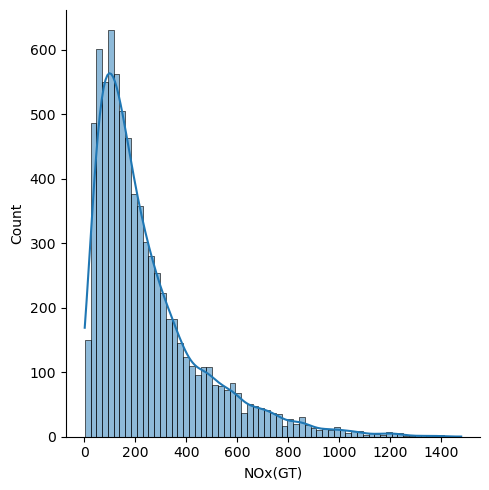

In [15]:
sns.displot(nox, kde=True)

#### **[+] 상용 로그 스케일로 변환**

In [17]:
nox_scaled = np.log10(df["NOx(GT)"])
nox_scaled

Datetime
2004-03-10 18:00:00    2.220108
2004-03-10 19:00:00    2.012837
2004-03-10 20:00:00    2.117271
2004-03-10 21:00:00    2.235528
2004-03-10 22:00:00    2.117271
                         ...   
2005-04-04 10:00:00    2.673942
2005-04-04 11:00:00    2.547775
2005-04-04 12:00:00    2.466868
2005-04-04 13:00:00    2.371068
2005-04-04 14:00:00    2.423246
Name: NOx(GT), Length: 9357, dtype: float64

#### **변환된 변수 분포 시각화**

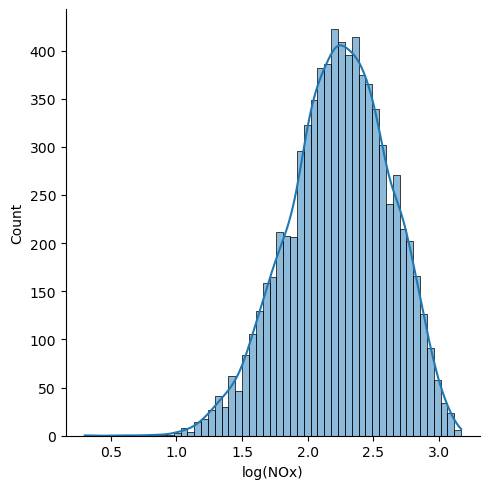

In [19]:
sns.displot(nox_scaled, kde=True)
plt.xlabel('log(NOx)')
plt.show()